TIme series predition of the ocean wave hieght with LSTM network



Data description 
    - Collection of data set for one year with time stamps of 7 sea state parameters
    - Total of 14900 instances with 7 atributes

Problem statement 
  - Deveopment of an RNN(LSTM) using tf for the future times for the offshore work case here for next 10 hours in future time.

Importing the packages required

In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

Data inforamtion and importing data removing the NaN

In [14]:
df = pd.read_csv('/mnt/c/Corework/LuFi_Significant wave _WiHi/Workfolder/Code Folder/Kiran_WiHi/LSTM_Significant_Ocean_Wave-_Hieght_Prediction/data/QualityData.csv')
df.dropna(inplace=True)
df.head()

,time,variables_1,variables_2,variables_3,variables_4,variables_5,variables_6,variables_7
0,01-Feb-2017 00:30:00,0.76,3.70,-0.146083,0.989272,7.73,-0.843298,0.537447
1,01-Feb-2017 01:00:00,0.72,3.45,-0.615661,0.788011,7.26,-0.864538,0.502567
2,01-Feb-2017 01:30:00,0.76,3.45,-0.634731,0.772734,7.55,-0.872496,0.488621
3,01-Feb-2017 02:00:00,0.75,3.33,-0.724172,0.689620,8.12,-0.894779,0.446510
4,01-Feb-2017 02:30:00,0.77,3.70,-0.313992,0.949425,7.55,-0.870442,0.492272


In [15]:
new_column_names = {
    'variables_1': 'VHMO',
    'variables_2': 'VTPK',
    'variables_3': 'VPED_cos',
    'variables_4': 'VPED_sin',
    'variables_5': 'WSPD_41m',
    'variables_6': 'WDIR_42m_cos',
    'variables_7': 'WDIR_42m_sin',
    # Add more mappings as needed here the variable 1, 2, 3 is replaced woth the interseted names, doen due to the csv data didnt had, not required it is optional but make the neccesary changes in the code!!
}

In [16]:

# Use the rename() function to replace the variable names
df.rename(columns=new_column_names, inplace=True)
df

,time,VHMO,VTPK,VPED_cos,VPED_sin,WSPD_41m,WDIR_42m_cos,WDIR_42m_sin
0,01-Feb-2017 00:30:00,0.76,3.70,-0.146083,0.989272,7.73,-0.843298,0.537447
1,01-Feb-2017 01:00:00,0.72,3.45,-0.615661,0.788011,7.26,-0.864538,0.502567
2,01-Feb-2017 01:30:00,0.76,3.45,-0.634731,0.772734,7.55,-0.872496,0.488621
3,01-Feb-2017 02:00:00,0.75,3.33,-0.724172,0.689620,8.12,-0.894779,0.446510
4,01-Feb-2017 02:30:00,0.77,3.70,-0.313992,0.949425,7.55,-0.870442,0.492272
...,...,...,...,...,...,...,...,...
14945,09-Dec-2017 09:00:00,4.81,11.11,0.941471,-0.337095,13.52,0.517579,-0.855635
14946,09-Dec-2017 09:30:00,5.00,10.00,0.882127,-0.471012,13.26,0.467313,-0.884092
14947,09-Dec-2017 10:00:00,5.09,11.76,0.932954,-0.359997,11.70,0.713128,-0.701034
14948,09-Dec-2017 10:30:00,4.99,11.76,0.914254,-0.405142,10.98,0.548877,-0.835903


In [17]:
# For rsearch purpose the data set was split !!! Can remove these lines below when trainig new model

  
spdf=df
split_row=13999

  
part1= spdf[:split_row]
part2=spdf[split_row:]
part1.to_csv('part1.csv', index=False)
part2.to_csv('part2.csv', index=False)

  


In [18]:
df = pd.read_csv('/mnt/c/Corework/LuFi_Significant wave _WiHi/Workfolder/Code Folder/Kiran_WiHi/LSTM_Significant_Ocean_Wave-_Hieght_Prediction/data/part1.csv')   # Replace the new data set for training , make sure that the the data is in the csv format, 
# Or else change the read format as per the format of the file

In [19]:
df.describe() #describes the data and type

,VHMO,VTPK,VPED_cos,VPED_sin,WSPD_41m,WDIR_42m_cos,WDIR_42m_sin
count,13999.000000,13999.000000,13999.000000,13999.000000,13999.000000,13999.000000,13999.000000
mean,1.391397,6.734691,0.388171,-0.435027,8.072616,-0.168481,-0.255762
std,0.904258,2.363973,0.531743,0.614306,3.896156,0.609249,0.731492
min,0.190000,2.560000,-1.000000,-1.000000,0.280000,-1.000000,-1.000000
25%,0.740000,5.000000,-0.048850,-0.941471,5.170000,-0.729685,-0.908872
50%,1.200000,6.250000,0.492424,-0.554844,7.580000,-0.249028,-0.565399
75%,1.800000,7.690000,0.893371,-0.290702,10.490000,0.313910,0.490600
max,11.020000,20.000000,1.000000,1.000000,29.330000,1.000000,1.000000


Data Exploration and time stamp indexing

In [20]:
df['time'] = pd.to_datetime(df['time'],infer_datetime_format=True) # Setting the time as the index!!!

/tmp/ipykernel_22149/3478152034.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['time'] = pd.to_datetime(df['time'],infer_datetime_format=True) # Setting the time as the index!!!


Data visualisation

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

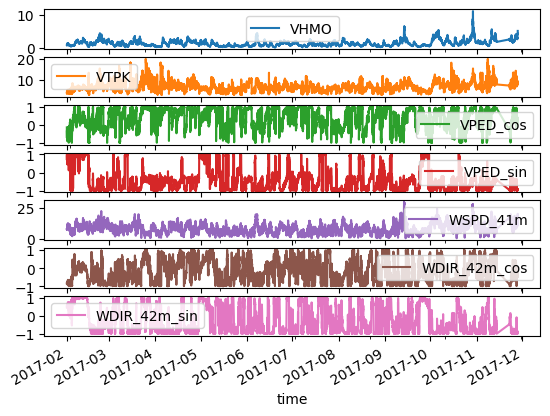

In [21]:
df.set_index('time')[['VHMO',	'VTPK',	'VPED_cos',	'VPED_sin',	'WSPD_41m',	'WDIR_42m_cos',	'WDIR_42m_sin']].plot(subplots=True) # Plot for the data loaded for training !!!

Defining the input data frame : Time stamps avoided in this case and a tool will be used later for efficient traning purpose

In [22]:
df_input = df[['VHMO',	'VTPK',	'VPED_cos',	'VPED_sin',	'WSPD_41m',	'WDIR_42m_cos',	'WDIR_42m_sin']]
df_input


,VHMO,VTPK,VPED_cos,VPED_sin,WSPD_41m,WDIR_42m_cos,WDIR_42m_sin
0,0.76,3.70,-0.146083,0.989272,7.73,-0.843298,0.537447
1,0.72,3.45,-0.615661,0.788011,7.26,-0.864538,0.502567
2,0.76,3.45,-0.634731,0.772734,7.55,-0.872496,0.488621
3,0.75,3.33,-0.724172,0.689620,8.12,-0.894779,0.446510
4,0.77,3.70,-0.313992,0.949425,7.55,-0.870442,0.492272
...,...,...,...,...,...,...,...
13994,3.90,8.33,0.219846,-0.975535,17.75,-0.494700,-0.869064
13995,4.36,9.09,0.405142,-0.914254,18.25,-0.401468,-0.915873
13996,4.07,9.09,0.267238,-0.963630,17.68,-0.291370,-0.956610
13997,4.44,9.09,0.195946,-0.980615,20.04,-0.172101,-0.985079
